In [19]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.utils import to_categorical

In [20]:
def load_data(data_path):
    emotions = ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    features = []
    labels = []
    
    for emotion in emotions:
        emotion_folder = os.path.join(data_path, emotion)
        for file_name in os.listdir(emotion_folder):
            file_path = os.path.join(emotion_folder, file_name)
            # Load audio file
            signal, sr = librosa.load(file_path, sr=22050)
            # Extract features (Mel-frequency cepstral coefficients)
            mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
            mfccs = np.mean(mfccs.T, axis=0)
            features.append(mfccs)
            labels.append(emotion)
    
    return np.array(features), np.array(labels)

In [21]:
# Load the data
data_path = "D:\\coding\\voiceemotion\\dataset\\tess2"
X, y = load_data(data_path)

In [22]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [23]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.9532 - loss: 0.1769
Test Loss: 0.19422052800655365
Test Accuracy: 0.9464285969734192


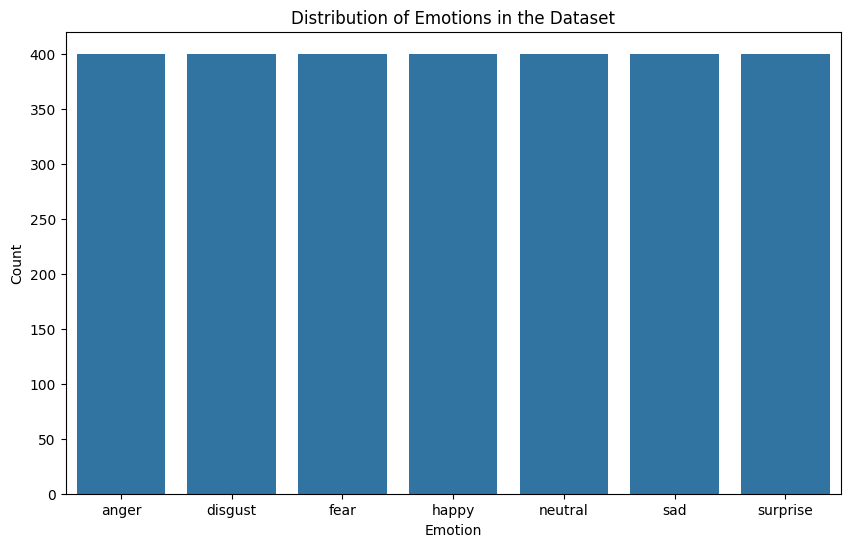

Test Accuracy: 0.9464285969734192


In [27]:
# Evaluate the model
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")  # Fixed the misplaced comment and typo
print(f"Test Accuracy: {accuracy}")

# Visualize the distribution of emotions in the dataset
plt.figure(figsize=(10, 6))
sns.countplot(x=y, order=np.unique(y))
plt.title("Distribution of Emotions in the Dataset")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

print(f"Test Accuracy: {accuracy}")


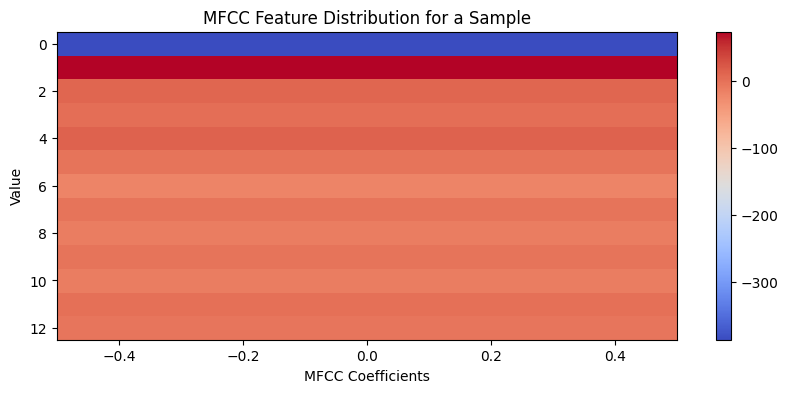

In [28]:
# Visualize the MFCC feature distribution for a sample
plt.figure(figsize=(10, 4))
plt.imshow(X_train[0].reshape(-1, 1), interpolation='nearest', cmap='coolwarm', aspect='auto')
plt.title("MFCC Feature Distribution for a Sample")
plt.xlabel("MFCC Coefficients")
plt.ylabel("Value")
plt.colorbar()
plt.show()

In [29]:
# Define the model
model = Sequential()
model.add(Input(shape=(X.shape[1],)))  # Input layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32)


Epoch 1/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1478 - loss: 30.5282 - val_accuracy: 0.2232 - val_loss: 1.9386
Epoch 2/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1422 - loss: 3.3531 - val_accuracy: 0.1357 - val_loss: 1.9458
Epoch 3/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.1600 - loss: 2.0706 - val_accuracy: 0.1357 - val_loss: 1.9459
Epoch 4/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.1411 - loss: 2.0463 - val_accuracy: 0.1357 - val_loss: 1.9461
Epoch 5/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.1645 - loss: 1.9692 - val_accuracy: 0.1357 - val_loss: 1.9461
Epoch 6/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.1438 - loss: 1.9624 - val_accuracy: 0.1357 - val_loss: 1.9461
Epoch 7/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.1436 - loss: 1.9636 - val_accuracy: 0.1357 - val_loss: 1.9462
Epoch 8/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.1547 - loss: 1.9605 - val_accurac

In [31]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9472 - loss: 0.1984  
Test Loss: 0.17230571806430817
Test Accuracy: 0.9482142925262451


In [32]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


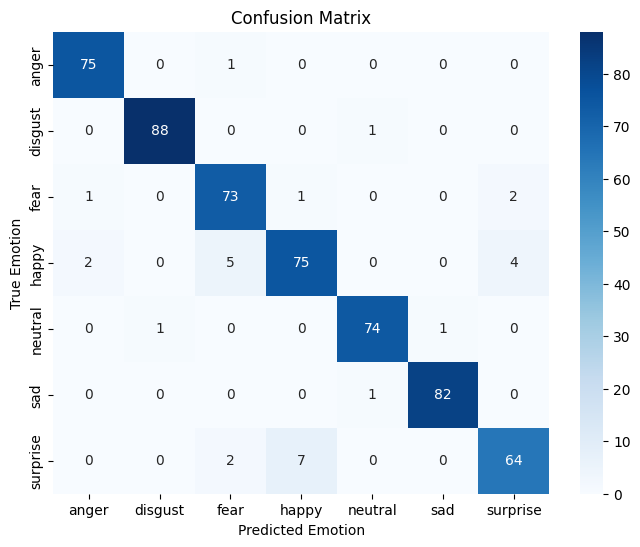

In [33]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

In [34]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=np.unique(y)))


Classification Report:
              precision    recall  f1-score   support

       anger       0.96      0.99      0.97        76
     disgust       0.99      0.99      0.99        89
        fear       0.90      0.95      0.92        77
       happy       0.90      0.87      0.89        86
     neutral       0.97      0.97      0.97        76
         sad       0.99      0.99      0.99        83
    surprise       0.91      0.88      0.90        73

    accuracy                           0.95       560
   macro avg       0.95      0.95      0.95       560
weighted avg       0.95      0.95      0.95       560



In [36]:
# Define the emotions corresponding to the output labels
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def predict_emotion(file_path):
    # Load and extract features from the audio file
    signal, sr = librosa.load(file_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    mfccs = np.mean(mfccs.T, axis=0)
    
    # Reshape for the model
    mfccs = mfccs.reshape(1, -1)
    
    # Predict the emotion
    prediction = model.predict(mfccs)
    predicted_emotion = emotions[np.argmax(prediction)]
    
    return predicted_emotion

# Example usage
new_audio_file = r"D:\coding\voiceemotion\VoiceEmotionDataset\neutral\03-01-06-01-01-01-01_aug0.wav"
predicted_emotion = predict_emotion(new_audio_file)
print(f"Predicted Emotion: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Emotion: neutral


In [38]:
# Save the trained model in the new Keras format
model.save('D:/coding/voiceemotion/codesssssss/saved_model.keras')
